In [8]:
import math

import pandas as pd


df = pd.read_csv("data/VideoDemographics.csv")
df  = df.loc[df["Sex"] == "Female"]
df

,ActorID,Age,Sex,Race,Ethnicity
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
5,1006,58,Female,Caucasian,Not Hispanic
6,1007,38,Female,African American,Not Hispanic
7,1008,46,Female,Caucasian,Not Hispanic
8,1009,24,Female,Caucasian,Not Hispanic
9,1010,27,Female,Caucasian,Not Hispanic
11,1012,23,Female,Caucasian,Not Hispanic
12,1013,22,Female,Caucasian,Hispanic


In [9]:
ids=df["ActorID"].tolist()
ids

[1002,
 1003,
 1004,
 1006,
 1007,
 1008,
 1009,
 1010,
 1012,
 1013,
 1018,
 1020,
 1021,
 1024,
 1025,
 1028,
 1029,
 1030,
 1037,
 1043,
 1046,
 1047,
 1049,
 1052,
 1053,
 1054,
 1055,
 1056,
 1058,
 1060,
 1061,
 1063,
 1072,
 1073,
 1074,
 1075,
 1076,
 1078,
 1079,
 1082,
 1084,
 1089,
 1091]

In [10]:
sentences = {"IEO","TIE","IOM","IWW","TAI","MTI","IWL","ITH","DFA","ITS","TSI","WSI"}
emotions ={"ANG","FEA","HAP","SAD"}


In [11]:
from pydub import AudioSegment
from scipy.io.wavfile import read

In [21]:
import os.path
import  math 

from Project.write_back_audio import write_back_audio
once=False
for id in ids[:1]:
    for sentence in sentences:
        name="data/curve_1000_right/"+str(id)+"_"+sentence+"_NEU_XX"
        
        if os.path.isfile(name) and not once:
            f1 = open(name, "r")  
            l1=f1.readlines()
            v1=l1[1].split(",")[:-1]
            for emotion in emotions:
                for intensity in ["XX","HI","LO"]:
                    name="data/curve_1000_right/"+str(id)+"_"+sentence+"_"+emotion+"_"+intensity+""       
                    if os.path.isfile(name) and not once:
                        print(name)
                        f2 = open(name, "r")
                        l2=f2.readlines()
                        v2=l2[1].split(",")[:-1]
                        vv1=[]
                        vv2=[]
                        #l1=math.floor(len(v1)/10)
                        #l2=math.floor((v2)/10)
                        #for l in range(10):
                        if len(v1)==len(v2):
                            div=[]
                            for i in range(len(v1)):
                                n1=abs(float(v2[i]))
                                vv1.append(n1)
                                n2=abs(float(v1[i]))   
                                vv2.append(n2)
                                if n1<math.inf and n2<math.inf and n2!=0:
                                    div.append(n1/n2)
                                else:
                                    div.append(0)
                            audioname="data/AudioWAV/"+str(id)+"_"+sentence+"_NEU_XX.wav"
                            rate, data = read(audioname)
                            audio = AudioSegment.from_file(audioname, 'r')

                            length = data.shape[0] / rate
                            final=write_back_audio([1]*(len(v1)+1),div,[0]*(len(v1)+1),audio,length)
                            final.export("data/"+str(id)+"_"+sentence+"_"+emotion+"_"+intensity+"test.wav", format="wav")
                            once=True
            

                        f2.close()
            f1.close()
        



data/curve_1000_right/1002_IOM_ANG_XX


/home/julia/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=51
  warnings.warn(
/home/julia/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=53
  warnings.warn(


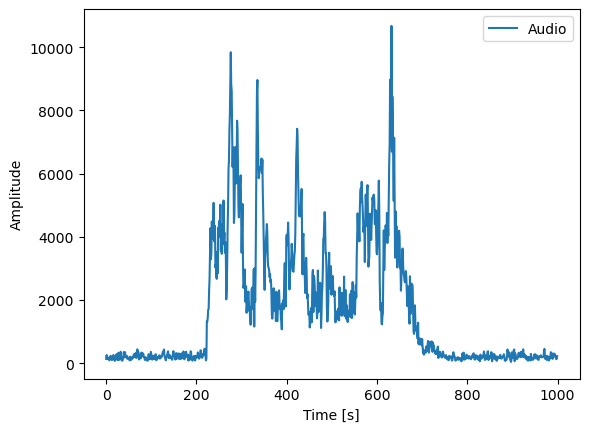

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([i for i in range(1000)], vv1, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [19]:
vv1

[135.33310436796722,
 255.5895086308641,
 156.14328411317553,
 137.2268086248027,
 179.7341162629647,
 146.08957336581153,
 155.6260729932361,
 86.99274840200403,
 148.0549677113737,
 212.6226206229975,
 231.88666078191864,
 120.27010314807472,
 140.58205394333103,
 99.17698202826307,
 189.67053558962198,
 197.15872596417466,
 258.06916183293157,
 150.33363649371353,
 112.58268366075141,
 71.55586345531256,
 204.3180771776581,
 164.49018383317892,
 227.88939671861098,
 283.51540355764024,
 110.99497331682066,
 272.5554503811368,
 92.78995881832758,
 327.53866405732794,
 241.96748393365627,
 255.47827841550134,
 106.02757319688803,
 184.60738622784817,
 360.5758775383,
 216.87465985740255,
 196.98328926527483,
 80.73120562007809,
 77.44606407763273,
 132.54284986524732,
 187.88199984936458,
 343.7402414646386,
 184.29783629966312,
 352.8216980391064,
 333.30177136045967,
 209.49944297057448,
 180.48379805429295,
 190.48511391430577,
 228.70372188482452,
 132.98836871780884,
 171.6007159

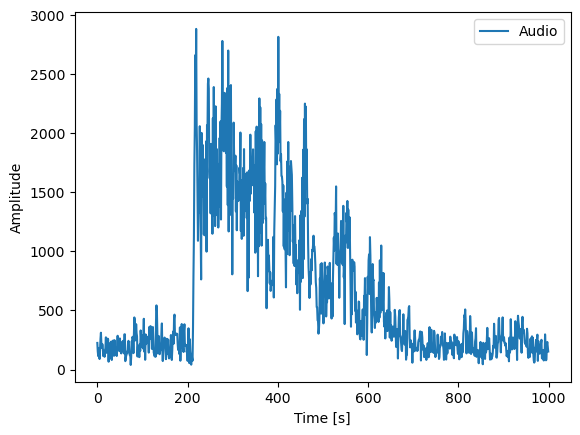

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([i for i in range(1000)], vv2, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()